<a href="https://colab.research.google.com/github/ogut77/DataScience/blob/main/AllTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade --no-deps statsmodels
!pip install tbats

     |████████████████████████████████| 9.8 MB 14.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
     |████████████████████████████████| 43 kB 1.8 MB/s 
     |████████████████████████████████| 1.4 MB 19.6 MB/s 


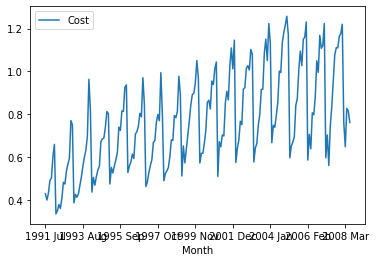

In [1]:
import pandas as pd
from matplotlib import pyplot
ap1=pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/h02.csv')
ap1=ap1.set_index('Month')
ap1.plot()
pyplot.show()


In [2]:
ap1

,Cost
Month,
1991 Jul,0.429795
1991 Aug,0.400906
1991 Sep,0.432159
1991 Oct,0.492543
1991 Nov,0.502369
...,...
2008 Feb,0.761822
2008 Mar,0.649435
2008 Apr,0.827887


In [3]:
#Testing for Stationary
from statsmodels.tsa.stattools import adfuller
result = adfuller(ap1['Cost'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.696756
p-value: 0.432785
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


Ho:Series is not stationary

Ha:Series is stationary

If significance level(alpha) is 5%, what is the decision?

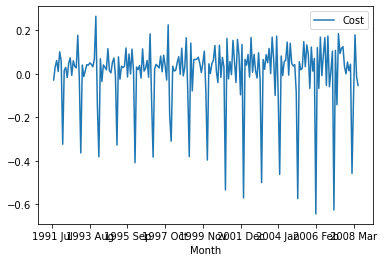

In [4]:
#Take differnce for making stationary
dap = ap1 - ap1.shift(1)
dap.plot()

In [5]:
from statsmodels.tsa.stattools import adfuller
dap=dap.dropna()
result = adfuller(dap['Cost'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.365938
p-value: 0.012176
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


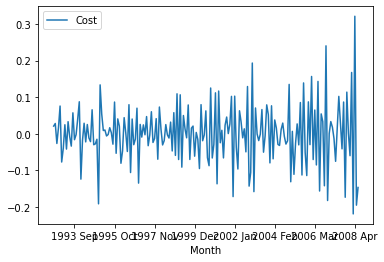

In [6]:
dap = dap - dap.shift(12)
dap.plot()

In [7]:
from statsmodels.tsa.stattools import adfuller
dap=dap.dropna()
result = adfuller(dap['Cost'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.070403
p-value: 0.000016
Critical Values:
	1%: -3.468
	5%: -2.878
	10%: -2.576


ACF and PACF

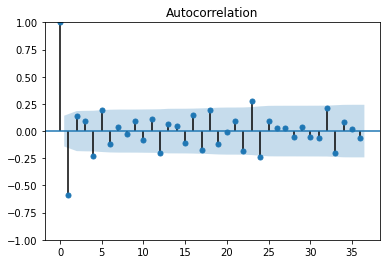

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


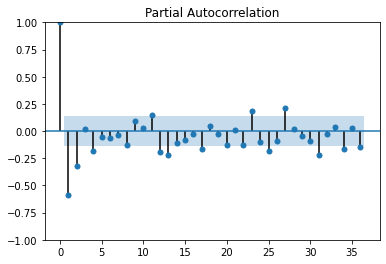

In [8]:
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

fig = tsaplots.plot_acf(dap['Cost'], lags=36)
plt.show()
fig = tsaplots.plot_pacf(dap['Cost'], lags=36)
plt.show()


In [ ]:
Ho:Series is not stationary

Ha:Series is stationary

If significance level(alpha) is 5%, what is the decision?

In [10]:

from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(ap1['Cost'],order=(0,1,1),seasonal_order=(0,1,1,12))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               Cost   No. Observations:                  204
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 279.164
Date:                            Wed, 11 May 2022   AIC                           -552.329
Time:                                    02:32:36   BIC                           -542.572
Sample:                                07-01-1991   HQIC                          -548.377
                                     - 06-01-2008                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7581      0.046    -16.443      0.000      -0.848      -0.668
ma.S.L12      -0.5650      0.056    -10.177      0.000      -0.674      -0.456
sigma2         0.0031      0.000     10.054      0.000       0.002       0.004
===================================================================================
Ljung-Box (L1) (Q):                   2.14   Jarque-Bera (JB):                 1.60
Prob(Q):                              0.14   Prob(JB):                         0.45
Heteroskedasticity (H):               2.31   Skew:                             0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:

from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(ap1['Cost'],order=(3,1,1),seasonal_order=(0,1,1,12))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               Cost   No. Observations:                  204
Model:             SARIMAX(3, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 287.664
Date:                            Wed, 11 May 2022   AIC                           -563.329
Time:                                    02:32:56   BIC                           -543.815
Sample:                                07-01-1991   HQIC                          -555.425
                                     - 06-01-2008                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0623      0.074      0.839      0.401      -0.083       0.208
ar.L2          0.3337      0.063      5.307      0.000       0.210       0.457
ar.L3          0.3019      0.082      3.700      0.000       0.142       0.462
ma.L1         -0.9716      0.039    -24.764      0.000      -1.048      -0.895
ma.S.L12      -0.5394      0.063     -8.627      0.000      -0.662      -0.417
sigma2         0.0028      0.000     10.475      0.000       0.002       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 2.56
Prob(Q):                              0.70   Prob(JB):                         0.28
Heteroskedasticity (H):               1.97   Skew:                             0.02
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
train=ap1[:-12]
test=ap1[-12:]
train

,Cost
Month,
1991 Jul,0.429795
1991 Aug,0.400906
1991 Sep,0.432159
1991 Oct,0.492543
1991 Nov,0.502369
...,...
2007 Feb,0.597753
2007 Mar,0.704398
2007 Apr,0.561760


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


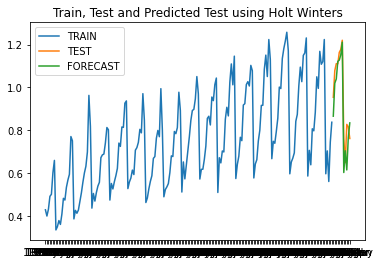

In [13]:

from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train['Cost'],order=(3,1,1), seasonal_order=(0,1,1,12))
model_fit=model.fit()
test_prediction = model_fit.forecast(12)
test_prediction=pd.DataFrame(test_prediction)
new_index = test.index
test_prediction=test_prediction.set_index(new_index)
test_prediction.columns=['Cost']
#As we take ln , convert back to original series using exp


plt.plot(train['Cost'],label='TRAIN')
plt.plot(test['Cost'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Train, Test and Predicted Test using Holt Winters');

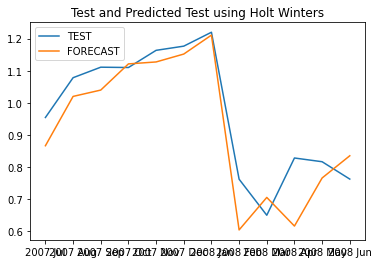

In [14]:
plt.plot(test['Cost'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Test and Predicted Test using Holt Winters');

In [15]:
#Evaluate forecasting Performance

from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test,test_prediction)}')
print(f'Mean Squared Error = {mean_squared_error(test,test_prediction)}')
import numpy as np
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100  
print(f'Mean Absolute Percentage Error = {mape(np.array(test),np.array(test_prediction) )}')

Mean Absolute Error = 0.07066773982196474
Mean Squared Error = 0.008278866274103921
Mean Absolute Percentage Error = 8.225084883927753



HOLT WINTERS

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


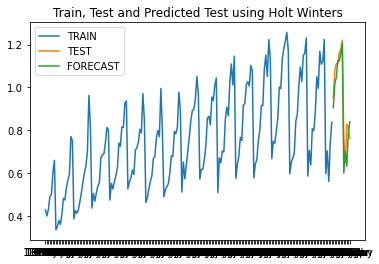

In [17]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
fitted_model = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_prediction = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=12).fit().forecast(12)
test_prediction=pd.DataFrame(test_prediction)
new_index = test.index
test_prediction=test_prediction.set_index(new_index)
test_prediction.columns=['Cost']


plt.plot(train['Cost'],label='TRAIN')
plt.plot(test['Cost'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Train, Test and Predicted Test using Holt Winters');

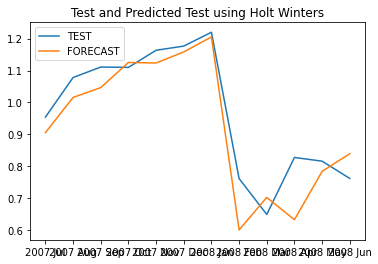

In [18]:
plt.plot(test['Cost'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Test and Predicted Test using Holt Winters');

In [19]:
#Evaluate forecasting Performance
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test,test_prediction)}')
print(f'Mean Squared Error = {mean_squared_error(test,test_prediction)}')
import numpy as np
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100  
print(f'Mean Absolute Percentage Error = {mape(np.array(test),np.array(test_prediction) )}')

Mean Absolute Error = 0.06513513772255573
Mean Squared Error = 0.007204818383369751
Mean Absolute Percentage Error = 7.5956025277059425


ETS

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


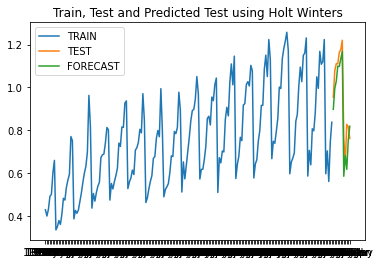

In [25]:
import numpy as np
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.metrics import mean_absolute_error,mean_squared_error
test_prediction=ETSModel(train['Cost'],error='add', trend='mul',seasonal='mul',damped_trend=True, seasonal_periods=12).fit().forecast(12)
test_prediction=pd.DataFrame(test_prediction)
new_index = test.index
test_prediction=test_prediction.set_index(new_index)
test_prediction.columns=['Cost']


plt.plot(train['Cost'],label='TRAIN')
plt.plot(test['Cost'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Train, Test and Predicted Test using ETS');

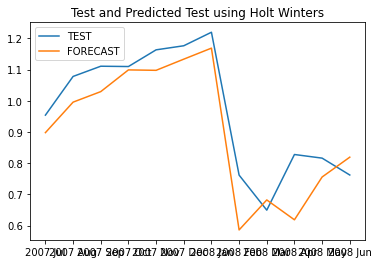

In [26]:
plt.plot(test['Cost'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Test and Predicted Test using ETS');

In [28]:
#Evaluate forecasting Performance
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test,test_prediction)}')
print(f'Mean Squared Error = {mean_squared_error(test,test_prediction)}')
import numpy as np
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100  
print(f'Mean Absolute Percentage Error = {mape(np.array(test),np.array(test_prediction) )}')

Mean Absolute Error = 0.07716990816628279
Mean Squared Error = 0.00901651469388742
Mean Absolute Percentage Error = 8.636004460197215


TBATS

In [ ]:
from tbats import TBATS, BATS# Fit the model
estimator = TBATS(
    seasonal_periods=[12],
    use_arma_errors=False,  # shall not try only models with ARMA
    use_box_cox=False # will not use Box-Cox
)
model = estimator.fit(train)
test_prediction = model.forecast(steps=12)

test_prediction=pd.DataFrame(test_prediction)
new_index = test.index
test_prediction=test_prediction.set_index(new_index)
test_prediction.columns=['Cost']


plt.plot(train['Cost'],label='TRAIN')
plt.plot(test['Cost'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Train, Test and Predicted Test using TBATS');

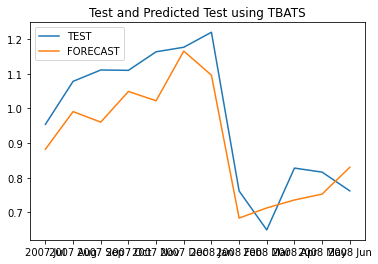

In [52]:
plt.plot(test['Cost'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Test and Predicted Test using TBATS');

In [53]:
#Evaluate forecasting Performance -TBATS
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test,test_prediction)}')
print(f'Mean Squared Error = {mean_squared_error(test,test_prediction)}')
import numpy as np
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100  
print(f'Mean Absolute Percentage Error = {mape(np.array(test),np.array(test_prediction) )}')

Mean Absolute Error = 0.08432562924822849
Mean Squared Error = 0.008486974510908483
Mean Absolute Percentage Error = 8.812089654369954
